# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 19.6613296334014969, performing 52.6 it/sec
Step 100: Loss = 5.0410922713998634, performing 101.3 it/sec
Step 200: Loss = 0.1546524223416071, performing 131.7 it/sec
Step 300: Loss = 0.0102890471300836, performing 187.2 it/sec
No improvement since Step 311, early stopping.
[Best]  Step 310: Loss = 0.0067703852370204
[Final] Step 360: Loss = 0.0065556441414429

predicted end states
-------------------------------------
          5th       Mean      95th
SPTR-1   8.55e-04  8.55e-04  8.55e-04
SPTR-2   8.49e-06  8.49e-06  8.49e-06
SPTR-3   8.68e-08  8.68e-08  8.68e-08
SPTR-4   3.28e-05  3.28e-05  3.28e-05
SPTR-5   3.26e-08  3.26e-08  3.26e-08
SPTR-6   3.19e-10  3.19e-10  3.19e-10
SPTR-7   2.92e-06  2.92e-06  2.92e-06
SPTR-8   2.94e-09  2.94e-09  2.94e-09
SPTR-9   3.03e-11  3.03e-11  3.03e-11
SPTR-10  1.27e-11  1.27e-11  1.27e-11
SPTR-1

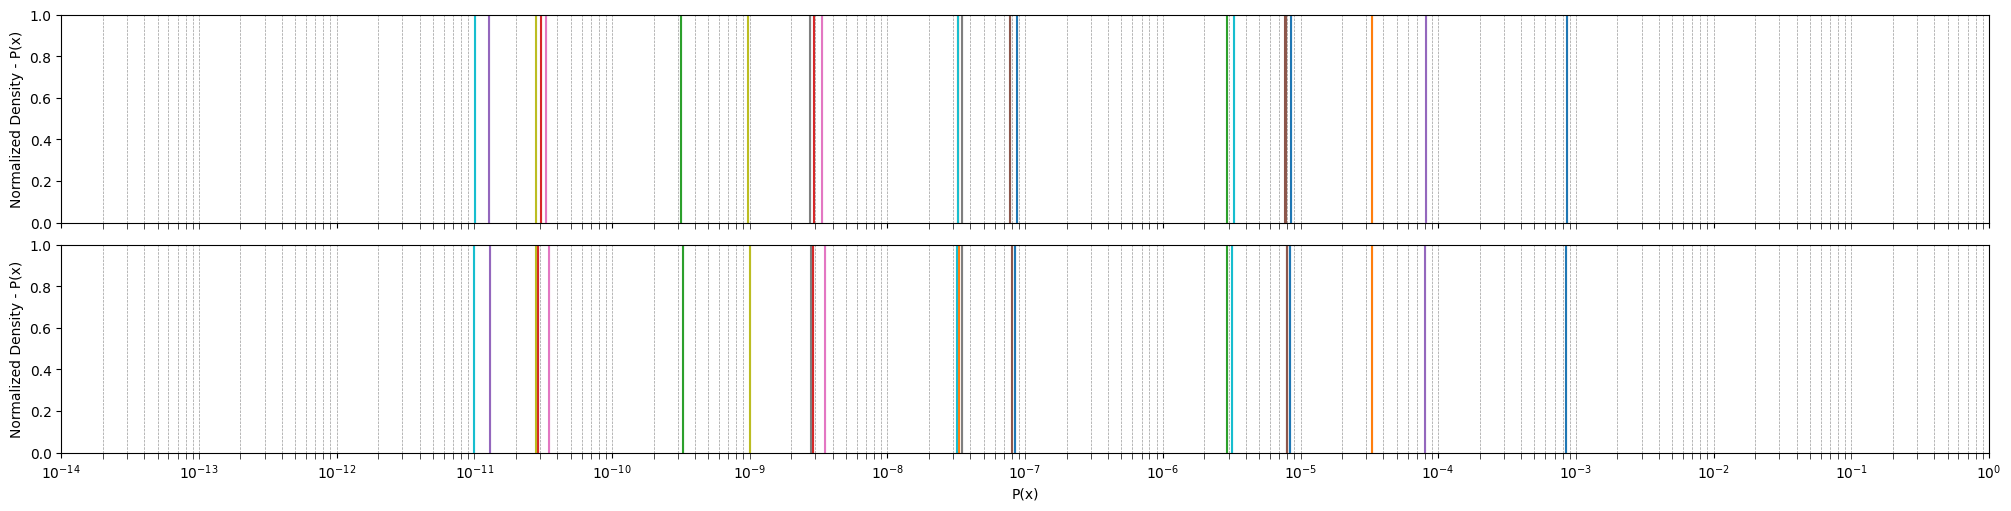

In [7]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 1e-3,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['SPTR', 'FSDG', 'MODS', 'LKDT|~MODS', 'LKDT|MODS', 'SPRS|~MODS|~LKDT','SPRS|~MODS|LKDT', 'SPRS|MODS|~LKDT', 'SPRS|MODS|LKDT', 'DUMS|~LKDT|~SPRS','DUMS|~LKDT|SPRS', 'DUMS|LKDT', 'PRRS|~FSDG|~LKDT|~SPRS','PRRS|~FSDG|~LKDT|SPRS', 'PRRS|~FSDG|LKDT|~SPRS','PRRS|~FSDG|LKDT|SPRS', 'PRRS|FSDG', 'RIHX|~MODS|~LKDT|~SPRS','RIHX|~MODS|~LKDT|SPRS', 'RIHX|~MODS|LKDT', 'RIHX|MODS|~LKDT|~SPRS','RIHX|MODS|~LKDT|SPRS', 'RIHX|MODS|LKDT|~SPRS'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'SPTR-1': {
        'sequence': [1, 0, 0, 0, np.nan, 0, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 8.4e-4,
    },
    'SPTR-2': {
        'sequence': [1, 0, 0, 0, np.nan, 0, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 8.4e-6,
    },
    'SPTR-3': {
        'sequence': [1, 0, 0, 0, np.nan, 0, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 8.4e-8,
    },
    'SPTR-4': {
        'sequence': [1, 0, 0, 0, np.nan, 1, np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 3.3e-5,
    },
    'SPTR-5': {
        'sequence': [1, 0, 0, 0, np.nan, 1, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan],
        'probability': 3.3e-8,
    },
    'SPTR-6': {
        'sequence': [1, 0, 0, 0, np.nan, 1, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 3.3e-10,
    },
    'SPTR-7': {
        'sequence': [1, 0, 0, 1, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 2.9e-6,
    },
    'SPTR-8': {
        'sequence': [1, 0, 0, 1, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan],
        'probability': 2.9e-9,
    },
    'SPTR-9': {
        'sequence': [1, 0, 0, 1, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan],
        'probability': 2.9e-11,
    },
    'SPTR-10': {
        'sequence': [1, 0, 0, 1, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.3e-11,
    },
    'SPTR-11': {
        'sequence': [1, 0, 1, np.nan, 0, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 8e-5,
    },
    'SPTR-12': {
        'sequence': [1, 0, 1, np.nan, 0, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan],
        'probability': 8e-6,
    },
    'SPTR-13': {
        'sequence': [1, 0, 1, np.nan, 0, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan],
        'probability': 8e-8,
    },
    'SPTR-14': {
        'sequence': [1, 0, 1, np.nan, 0, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 8e-6,
    },
    'SPTR-15': {
        'sequence': [1, 0, 1, np.nan, 0, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan],
        'probability': 3.5e-9,
    },
    'SPTR-16': {
        'sequence': [1, 0, 1, np.nan, 0, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 1, np.nan],
        'probability': 3.5e-11,
    },
    'SPTR-17': {
        'sequence': [1, 0, 1, np.nan, 1, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 3.5e-8,
    },
    'SPTR-18': {
        'sequence': [1, 0, 1, np.nan, 1, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0],
        'probability': 2.8e-9,
    },
    'SPTR-19': {
        'sequence': [1, 0, 1, np.nan, 1, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 1],
        'probability': 2.8e-11,
    },
    'SPTR-20': {
        'sequence': [1, 0, 1, np.nan, 1, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1e-9,
    },
    'SPTR-21': {
        'sequence': [1, 0, 1, np.nan, 1, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1e-11,
    },
    'SPTR-22': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 3.2e-6,
    },
    'SPTR-23': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 3.2e-8,
    },

}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_metrics=False)